#Set-Up

In [ ]:
#Copy-and-paste the code below to use as "set-up" when your optimization model uses Pyomo and Coin-OR solvers.
#for reference, see https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/01.02-Running-Pyomo-on-Google-Colab.html#installing-pyomo-and-solvers

%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

from pyomo.environ import *

#First Try (No Optimization)

Team 1:
  Student 2 - GPA: 3.96, SQL: True
  Student 35 - GPA: 3.96, SQL: False
  Student 40 - GPA: 3.9, SQL: True
  Student 21 - GPA: 3.88, SQL: False
  Student 1 - GPA: 3.86, SQL: False

Team 2:
  Student 27 - GPA: 3.85, SQL: True
  Student 6 - GPA: 3.84, SQL: False
  Student 24 - GPA: 3.83, SQL: False
  Student 41 - GPA: 3.81, SQL: False
  Student 28 - GPA: 3.74, SQL: True

Team 3:
  Student 19 - GPA: 3.62, SQL: True
  Student 8 - GPA: 3.56, SQL: False
  Student 14 - GPA: 3.55, SQL: False
  Student 5 - GPA: 3.48, SQL: False
  Student 7 - GPA: 3.42, SQL: False
  Student 44 - GPA: 2.08, SQL: True

Team 4:
  Student 25 - GPA: 3.41, SQL: False
  Student 30 - GPA: 3.36, SQL: False
  Student 4 - GPA: 3.32, SQL: False
  Student 38 - GPA: 3.31, SQL: False
  Student 34 - GPA: 3.3, SQL: True
  Student 36 - GPA: 2.08, SQL: True

Team 5:
  Student 13 - GPA: 3.28, SQL: False
  Student 22 - GPA: 3.18, SQL: False
  Student 9 - GPA: 3.17, SQL: False
  Student 11 - GPA: 3.15, SQL: False
  Student 26

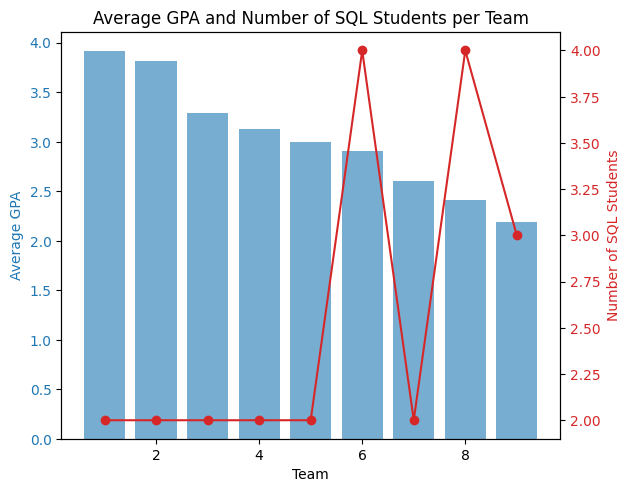

In [ ]:
import random
import matplotlib.pyplot as plt

# Sample data
students = [
    {"name": f"Student {i+1}", "gpa": round(random.uniform(2.0, 4.0), 2), "sql": random.choice([True, False])}
    for i in range(45)
]

# Sort students by GPA
students.sort(key=lambda x: x["gpa"], reverse=True)

# Function to create teams
def create_teams(students):
    teams = []
    team_size = 5
    sql_students = [s for s in students if s["sql"]]
    non_sql_students = [s for s in students if not s["sql"]]

    for i in range(0, len(students), team_size):
        team = students[i:i + team_size]
        # Ensure at least 2 SQL students per team
        sql_count = sum(1 for s in team if s["sql"])
        if sql_count < 2:
            needed_sql = 2 - sql_count
            for _ in range(needed_sql):
                if sql_students:
                    team.append(sql_students.pop())
                else:
                    team.append(non_sql_students.pop())
        teams.append(team)

    return teams

# Create teams
teams = create_teams(students)

# Print teams
for i, team in enumerate(teams):
    print(f"Team {i+1}:")
    for student in team:
        print(f"  {student['name']} - GPA: {student['gpa']}, SQL: {student['sql']}")
    print()

# Calculate average GPA and number of SQL students per team
average_gpas = []
sql_counts = []

for team in teams:
    gpas = [student['gpa'] for student in team]
    sql_count = sum(1 for student in team if student['sql'])
    average_gpas.append(sum(gpas) / len(gpas))
    sql_counts.append(sql_count)

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Team')
ax1.set_ylabel('Average GPA', color=color)
ax1.bar(range(1, len(teams) + 1), average_gpas, color=color, alpha=0.6, label='Average GPA')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of SQL Students', color=color)
ax2.plot(range(1, len(teams) + 1), sql_counts, color=color, marker='o', label='SQL Students')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average GPA and Number of SQL Students per Team')
plt.show()


#Second try (Trying to get AI to do MIP)

In [ ]:
# Explicit lists for student data
student_names = [
    "Student 1", "Student 2", "Student 3", "Student 4", "Student 5",
    "Student 6", "Student 7", "Student 8", "Student 9", "Student 10",
    "Student 11", "Student 12", "Student 13", "Student 14", "Student 15",
    "Student 16", "Student 17", "Student 18", "Student 19", "Student 20",
    "Student 21", "Student 22", "Student 23", "Student 24", "Student 25",
    "Student 26", "Student 27", "Student 28", "Student 29", "Student 30",
    "Student 31", "Student 32", "Student 33", "Student 34", "Student 35",
    "Student 36", "Student 37", "Student 38", "Student 39", "Student 40",
    "Student 41", "Student 42", "Student 43", "Student 44", "Student 45"
]

gpas = [
    3.5, 3.8, 4.0, 3.2, 3.6, 3.9, 2.8, 3.1, 3.7, 3.3,
    3.4, 3.0, 3.5, 3.8, 4.0, 3.2, 3.6, 3.9, 2.8, 3.1,
    3.7, 3.3, 3.4, 3.0, 3.5, 3.8, 4.0, 3.2, 3.6, 3.9,
    2.8, 3.1, 3.7, 3.3, 3.4, 3.0, 3.5, 3.8, 4.0, 3.2,
    3.6, 3.9, 2.8, 3.1, 3.7
]

sql_experience = [
    True, False, True, False, True, True, False, True, False, True,
    False, True, False, True, True, False, True, False, True, True,
    False, True, False, True, True, False, True, False, True, True,
    False, True, False, True, True, False, True, False, True, True,
    False, True, False, True, True
]


In [ ]:
import random
from pyomo.environ import *

# Explicit lists for student data
student_names = [
    "Student 1", "Student 2", "Student 3", "Student 4", "Student 5",
    "Student 6", "Student 7", "Student 8", "Student 9", "Student 10",
    "Student 11", "Student 12", "Student 13", "Student 14", "Student 15",
    "Student 16", "Student 17", "Student 18", "Student 19", "Student 20",
    "Student 21", "Student 22", "Student 23", "Student 24", "Student 25",
    "Student 26", "Student 27", "Student 28", "Student 29", "Student 30",
    "Student 31", "Student 32", "Student 33", "Student 34", "Student 35",
    "Student 36", "Student 37", "Student 38", "Student 39", "Student 40",
    "Student 41", "Student 42", "Student 43", "Student 44", "Student 45"
]

gpas = [
    3.5, 3.8, 4.0, 3.2, 3.6, 3.9, 2.8, 3.1, 3.7, 3.3,
    3.4, 3.0, 3.5, 3.8, 4.0, 3.2, 3.6, 3.9, 2.8, 3.1,
    3.7, 3.3, 3.4, 3.0, 3.5, 3.8, 4.0, 3.2, 3.6, 3.9,
    2.8, 3.1, 3.7, 3.3, 3.4, 3.0, 3.5, 3.8, 4.0, 3.2,
    3.6, 3.9, 2.8, 3.1, 3.7
]

sql_experience = [
    True, False, True, False, True, True, False, True, False, True,
    False, True, False, True, True, False, True, False, True, True,
    False, True, False, True, True, False, True, False, True, True,
    False, True, False, True, True, False, True, False, True, True,
    False, True, False, True, True
]

# Convert boolean SQL experience to integers
sql_experience = [int(exp) for exp in sql_experience]

# Create a model
model = ConcreteModel()

# Sets
model.students = RangeSet(1, 45)
model.teams = RangeSet(1, 9)  # Assuming 9 teams (45 students / 5 students per team)

# Parameters
gpa = {i+1: gpas[i] for i in range(45)}
sql = {i+1: sql_experience[i] for i in range(45)}

# Calculate overall average GPA
average_gpa = sum(gpas) / len(gpas)

# Variables
model.x = Var(model.students, model.teams, within=Binary)
model.team_gpa_sum = Var(model.teams, within=NonNegativeReals)
model.team_size = Var(model.teams, within=NonNegativeIntegers)
model.team_deviation = Var(model.teams, within=NonNegativeReals)
model.max_deviation = Var(within=NonNegativeReals)

# Objective: Minimize the maximum deviation from the average GPA
def objective_rule(model):
    return model.max_deviation
model.objective = Objective(rule=objective_rule, sense=minimize)

# Constraints
# Each student is assigned to exactly one team
def single_team_rule(model, s):
    return sum(model.x[s, t] for t in model.teams) == 1
model.single_team = Constraint(model.students, rule=single_team_rule)

# Each team has 4-5 students
def team_size_rule(model, t):
    return inequality(4, model.team_size[t], 5)
model.team_size_constraint = Constraint(model.teams, rule=team_size_rule)

# Each team has at least  2 students with SQL experience
def sql_experience_rule(model, t):
    return sum(model.x[s, t] * sql[s] for s in model.students) >= 2
model.sql_experience = Constraint(model.teams, rule=sql_experience_rule)

# Calculate the sum of GPAs for each team
def team_gpa_sum_rule(model, t):
    return model.team_gpa_sum[t] == sum(gpa[s] * model.x[s, t] for s in model.students)
model.team_gpa_sum_constraint = Constraint(model.teams, rule=team_gpa_sum_rule)

# Calculate the number of students in each team
def team_size_calc_rule(model, t):
    return model.team_size[t] == sum(model.x[s, t] for s in model.students)
model.team_size_calc_constraint = Constraint(model.teams, rule=team_size_calc_rule)

# Calculate the deviation from the average GPA for each team
def team_deviation_rule(model, t):
    return model.team_deviation[t] >= model.team_gpa_sum[t] - average_gpa * model.team_size[t]
model.team_deviation_upper = Constraint(model.teams, rule=team_deviation_rule)

def team_deviation_rule_lower(model, t):
    return model.team_deviation[t] >= average_gpa * model.team_size[t] - model.team_gpa_sum[t]
model.team_deviation_lower = Constraint(model.teams, rule=team_deviation_rule_lower)

# Ensure the maximum deviation is greater than or equal to the deviation of each team
def max_deviation_rule(model, t):
    return model.max_deviation >= model.team_deviation[t]
model.max_deviation_constraint = Constraint(model.teams, rule=max_deviation_rule)

# Solve the model with a time limit and integer optimality gap
solver = SolverFactory('cbc')
solver.options['seconds'] = 20  # Set time limit to 20 seconds
solver.options['ratio'] = 0.1  # Set integer optimality gap to 0.1
solver.solve(model, tee=True)

# Display results
for t in model.teams:
    team_members = [s for s in model.students if model.x[s, t].value == 1]
    print(f"Team {t}: {[student_names[s-1] for s in team_members]}")


Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Jun  7 2023 

command line - /content/bin/cbc -seconds 20 -ratio 0.1 -printingOptions all -import /tmp/tmpr6uj5cwx.pyomo.lp -stat=1 -solve -solu /tmp/tmpr6uj5cwx.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 20
ratioGap was changed from 0 to 0.1
Option for printingOptions changed from normal to all
Presolve is modifying 18 integer bounds and re-presolving
Presolve 99 (-18) rows, 433 (0) columns and 1548 (-18) elements
Statistics for presolved model
Original problem has 414 integers (405 of which binary)
==== 432 zero objective 2 different
432 variables have objective of 0
1 variables have objective of 1
==== absolute objective values 2 different
432 variables have objective of 0
1 variables have objective of 1
==== for integers 414 zero objective 1 different
414 variables have objective of 0
==== for integers absolute objective values 1 different
414 variables have objective of 0
===== end objective coun

Team 1: ['Student 2', 'Student 4', 'Student 27', 'Student 31', 'Student 37']
Team 2: ['Student 6', 'Student 12', 'Student 14', 'Student 17', 'Student 36']
Team 3: ['Student 9', 'Student 10', 'Student 18', 'Student 34', 'Student 44']
Team 4: ['Student 3', 'Student 7', 'Student 8', 'Student 15', 'Student 35']
Team 5: ['Student 25', 'Student 28', 'Student 30', 'Student 38', 'Student 43']
Team 6: ['Student 32', 'Student 33', 'Student 40', 'Student 41', 'Student 45']
Team 7: ['Student 13', 'Student 16', 'Student 21', 'Student 24', 'Student 42']
Team 8: ['Student 1', 'Student 19', 'Student 23', 'Student 29', 'Student 39']
Team 9: ['Student 5', 'Student 11', 'Student 20', 'Student 22', 'Student 26']


Team 1: ['Student 2', 'Student 4', 'Student 27', 'Student 31', 'Student 37']
Team 2: ['Student 6', 'Student 12', 'Student 14', 'Student 17', 'Student 36']
Team 3: ['Student 9', 'Student 10', 'Student 18', 'Student 34', 'Student 44']
Team 4: ['Student 3', 'Student 7', 'Student 8', 'Student 15', 'Student 35']
Team 5: ['Student 25', 'Student 28', 'Student 30', 'Student 38', 'Student 43']
Team 6: ['Student 32', 'Student 33', 'Student 40', 'Student 41', 'Student 45']
Team 7: ['Student 13', 'Student 16', 'Student 21', 'Student 24', 'Student 42']
Team 8: ['Student 1', 'Student 19', 'Student 23', 'Student 29', 'Student 39']
Team 9: ['Student 5', 'Student 11', 'Student 20', 'Student 22', 'Student 26']


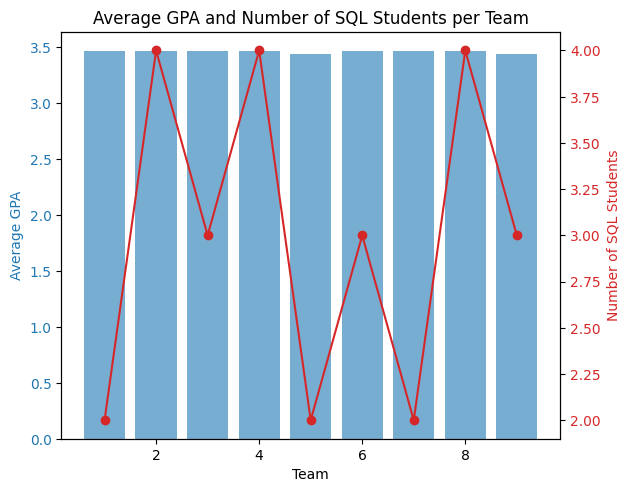

In [ ]:
# Display results and collect data for plotting
team_avg_gpas = []
team_sql_counts = []

for t in model.teams:
    team_members = [s for s in model.students if model.x[s, t].value == 1]
    team_gpa_sum = sum(gpa[s] for s in team_members)
    team_size = len(team_members)
    team_avg_gpa = team_gpa_sum / team_size if team_size > 0 else 0
    team_sql_count = sum(sql[s] for s in team_members)

    team_avg_gpas.append(team_avg_gpa)
    team_sql_counts.append(team_sql_count)

    print(f"Team {t}: {[student_names[s-1] for s in team_members]}")

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Team')
ax1.set_ylabel('Average GPA', color=color)
ax1.bar(range(1, len(model.teams) + 1), team_avg_gpas, color=color, alpha=0.6, label='Average GPA')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of SQL Students', color=color)
ax2.plot(range(1, len(model.teams) + 1), team_sql_counts, color=color, marker='o', label='SQL Students')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average GPA and Number of SQL Students per Team')
plt.show()